Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [15]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

## load and inspect data

In [16]:
crypto_currency = 'AAVE'
against_currency = 'USD'

start = dt.datetime(2020,1,1)
end = dt.datetime.now()

aave_df = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)
aave_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-31,385.298737,369.995331,377.183685,377.611786,342371946.0,377.611786
2021-04-01,408.479919,374.290924,377.514648,406.692291,480081712.0,406.692291
2021-04-02,411.377075,385.415894,406.883606,385.420563,395544800.0,385.420563
2021-04-03,409.579529,382.788849,385.526978,404.309723,330959728.0,404.309723
2021-04-04,407.329315,388.300354,404.392944,397.924561,306918909.0,397.924561
...,...,...,...,...,...,...
2021-06-12,317.608368,267.801270,278.738678,317.129181,327631351.0,317.129181
2021-06-13,336.040161,309.090332,316.284821,317.901367,335306770.0,317.901367
2021-06-14,326.900909,308.366943,319.400604,319.757294,352145487.0,319.757294


In [17]:
aave_df['Spread'] = aave_df.High - aave_df.Low
aave_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 78 entries, 2021-03-31 to 2021-06-18
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       78 non-null     float64
 1   Low        78 non-null     float64
 2   Open       78 non-null     float64
 3   Close      78 non-null     float64
 4   Volume     78 non-null     float64
 5   Adj Close  78 non-null     float64
 6   Spread     78 non-null     float64
dtypes: float64(7)
memory usage: 4.9 KB


## Plot the closing value of aave over time

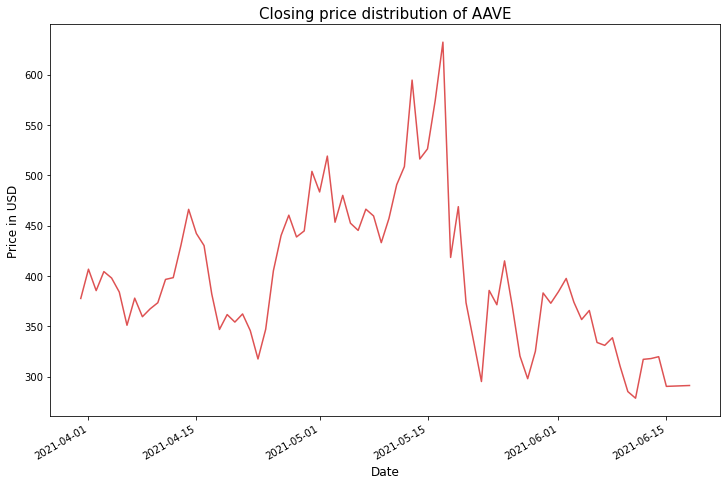

In [19]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(y = aave_df.Close.values, x=aave_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of AAVE", fontsize=15)
plt.show()

## Candlestick chart

In [21]:
import matplotlib.ticker as mticker
import mplfinance as mpf

#aave_df['Date_mpl'] = aave_df['Date'].apply(lambda x: mdates.date2num(x))

temp_aave_df = aave_df.copy(deep=False)
#temp_aave_df = temp_aave_df.set_index(['Date'])
temp_aave_df = temp_aave_df.drop(['Spread'], axis=1)
temp_aave_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-31,385.298737,369.995331,377.183685,377.611786,342371946.0,377.611786
2021-04-01,408.479919,374.290924,377.514648,406.692291,480081712.0,406.692291
2021-04-02,411.377075,385.415894,406.883606,385.420563,395544800.0,385.420563
2021-04-03,409.579529,382.788849,385.526978,404.309723,330959728.0,404.309723
2021-04-04,407.329315,388.300354,404.392944,397.924561,306918909.0,397.924561
...,...,...,...,...,...,...
2021-06-12,317.608368,267.801270,278.738678,317.129181,327631351.0,317.129181
2021-06-13,336.040161,309.090332,316.284821,317.901367,335306770.0,317.901367
2021-06-14,326.900909,308.366943,319.400604,319.757294,352145487.0,319.757294


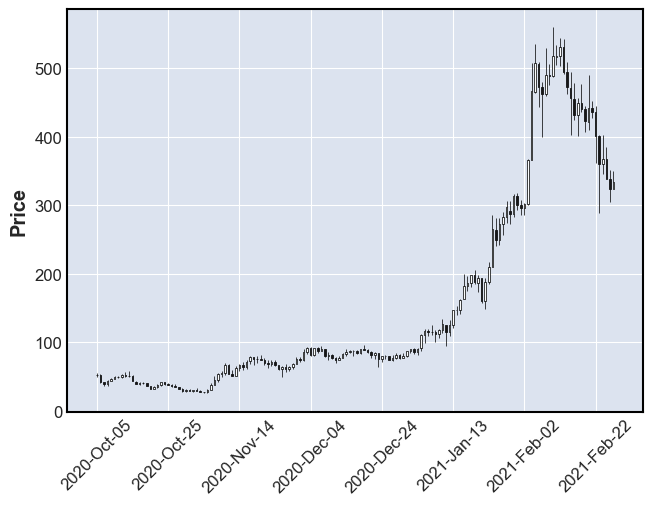

In [7]:
mpf.plot(temp_aave_df, type='candle', mav=(5,10), volume=True)

In [8]:
#fig = plt.figure(figsize=(12,8))
#ax1 = plt.subplot2grid((1,1), (0,0))

#candlestick_df = aave_df[aave_df['Date']>'2017-05-01']
#ohlc = []
#for ind, row in candlestick_df.iterrows():
#    ol = [row['Date_mpl'],row['Open'], row['High'], row['Low'], row['Close'], row['Volume']]
#    ohlc.append(ol)
    
## candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
#plt.xlabel("Date", fontsize=12)
#plt.ylabel("Price in USD", fontsize=12)
#plt.title("Candlestick chart for Aave", fontsize=15)
#plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
#plt.show()

In [9]:
#aave_df_2 = pd.read_csv('../../resources/prices/coin_Aave.csv', index_col='SNo',parse_dates=['Date'])
#aave_df_2['Date_mpl'] = aave_df_2['Date'].apply(lambda x: mdates.date2num(x))

#fig, ax = plt.subplots(figsize=(12,8))
## sns.lineplot(aave_df_2.Close.values, time=aave_df_2.Date_mpl.values, alpha=0.8, color=color[2], ax=ax)
#ax.xaxis.set_major_locator(mdates.AutoDateLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
#fig.autofmt_xdate()
#plt.xlabel('Date', fontsize=12)
#plt.ylabel('Price in USD', fontsize=12)
#plt.title("Closing price distribution of AAVE", fontsize=15)
#plt.show()

## Future Price Prediction

In [10]:
from fbprophet import Prophet

In [11]:
INPUT_FILE = "coin_Aave.csv"

price_predict_df = pd.read_csv("../../resources/prices/" + INPUT_FILE, parse_dates=['Date'], usecols=["Date", "Close"])
price_predict_df.columns = ["ds", "y"]

m = Prophet()
m.fit(price_predict_df);
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
171,2021-03-25 23:59:59,652.323034,591.115812,714.367859
172,2021-03-26 23:59:59,658.707905,597.630749,721.646004
173,2021-03-27 23:59:59,664.278769,605.763700,724.406628
174,2021-03-28 23:59:59,676.468318,610.880046,738.573805
175,2021-03-29 23:59:59,681.268194,618.099140,742.903599


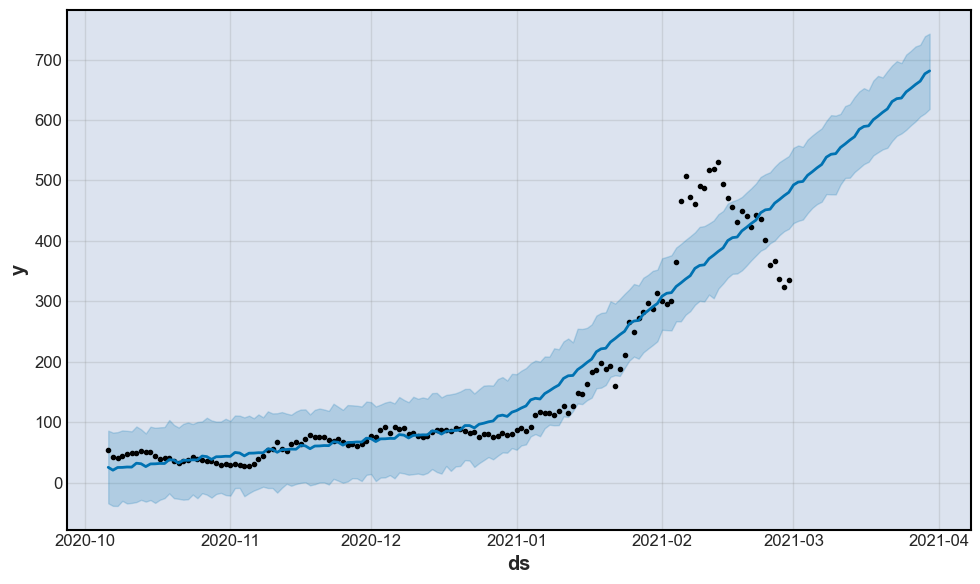

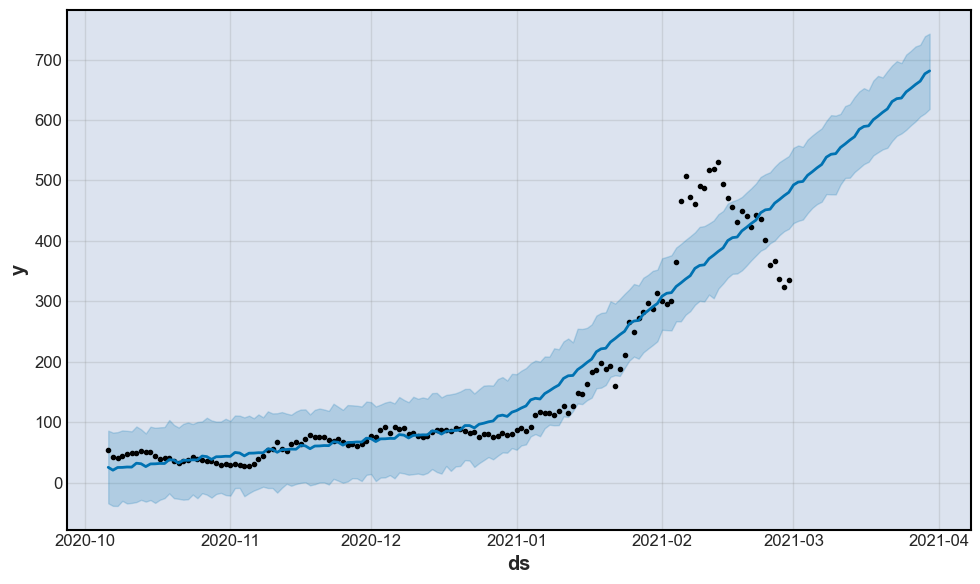

In [12]:
m.plot(forecast)

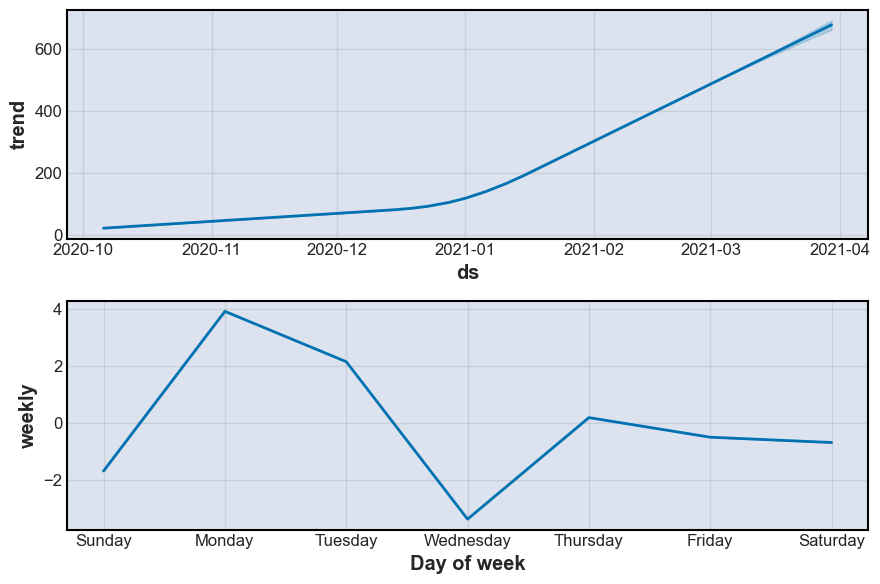

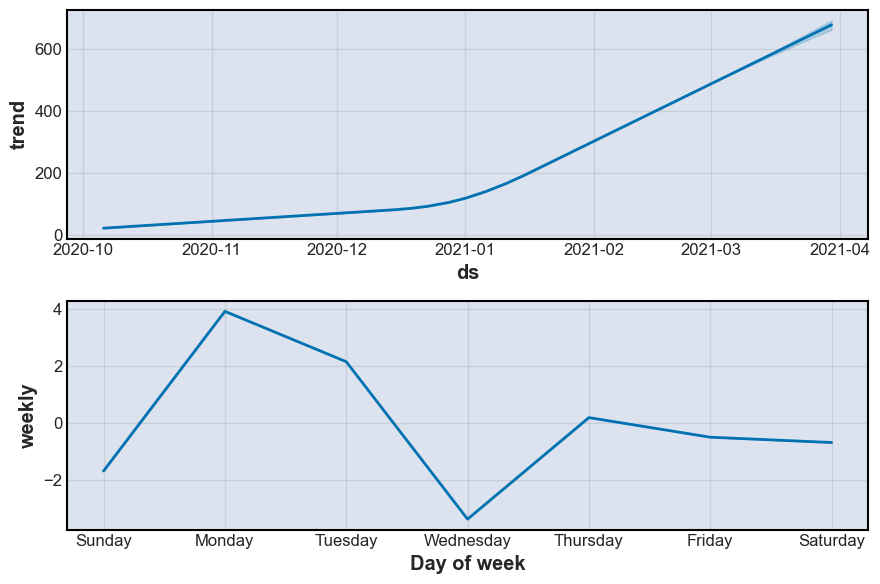

In [13]:
m.plot_components(forecast)